In [22]:
"""Create parameters.py and load it"""

# Directory for .inp file:
path = 'D:/parameter_studies/Bubble_dynamics_simulation/INP file examples/chem_Otomo2018_without_O.inp'

# import libraries:
import importlib   # For reloading your own files
from termcolor import colored   # for colored error messages
# my own files:
try:
    import inp_data_extractor as inp
except:
    try:
        import Bubble_dynamics_simulation.inp_data_extractor as inp
    except:
        print(colored(f'Error, \'inp_data_extractor.py\' not found', 'red'))
importlib.reload(inp)   # reload changes you made
inp.extract(path)

import parameters as par   # numeric constants and coefficents
importlib.reload(par)   # reload changes you made
print(par.model)

path=D:/parameter_studies/Bubble_dynamics_simulation/INP file examples/chem_Otomo2018_without_O.inp
Note, lambda value for specie 'H' is not in data.py: 0.0 is used
Note, lambda value for specie 'NH2' is not in data.py: 0.0 is used
Note, lambda value for specie 'NH' is not in data.py: 0.0 is used
Note, lambda value for specie 'N' is not in data.py: 0.0 is used
Note, lambda value for specie 'NNH' is not in data.py: 0.0 is used
Note, lambda value for specie 'N2H4' is not in data.py: 0.0 is used
Note, lambda value for specie 'N2H3' is not in data.py: 0.0 is used
Note, lambda value for specie 'N2H2' is not in data.py: 0.0 is used
Note, lambda value for specie 'H2NN' is not in data.py: 0.0 is used
Warning, third body 'H2O' is not in species in line 64 (' H2/2.5/ H2O/12/ AR/0.0/ ') in reaction 'H2+M=H+H+M'
Warning, third body 'AR' is not in species in line 64 (' H2/2.5/ H2O/12/ AR/0.0/ ') in reaction 'H2+M=H+H+M'
model: chem_Otomo2018_without_O
File 'parameters.py' succesfully created
chem_O

In [29]:
"""Libraries"""

# for plotting:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

import numpy as np   # matrices, math
import os    # file management
import pandas as pd   # data frames
import importlib   # for reloading your own files
from termcolor import colored   # for colored error messages

# my own file:
already_imported = 'de' in globals()
try:
    import full_bubble_model as de
except:
    try:
        import Bubble_dynamics_simulation.full_bubble_model as de
    except:
        print(colored(f'Error, \'full_bubble_model.py\' not found', 'red'))
if already_imported: importlib.reload(de)   # reload changes you made

model: chem_Otomo2018_without_O
target specie: NH3
excitation: sin_impulse_logf (control parameters: ['p_A', 'logf', 'n'])
enable heat transfer: True	enable evaporation: False	enable reactions: True	enable dissipated energy: True


In [30]:
"""Base settings"""

directory = r'D:\parameter_studies\2_plus_1_gradient_search\1_atm'#'D:\\parameter_studies\\Bubble_dynamics_simulation\\test 1'
file_base_name = 'output_'

In [31]:
"""Load all CSV files from directory into a dataframe (all_data)"""

# create a dataframe
all_data = pd.DataFrame()
num = 0
print(f'Found files:')

# iterate trough all files in directory (including subdirectories)
for (root, dirs, files) in os.walk(directory):
    for file in files:
        # ignore python rubish
        if 'ipynb_checkpoints' in root:
            continue
        # check if it's a CSV starting with file_base_name
        if file[-4:] != '.csv':
            continue
        if file[:len(file_base_name)] != file_base_name:
            continue

        # read file
        num += 1
        current_data = pd.read_csv(os.path.join(root, file))
        print(f'\t{file: <24} ({current_data.shape[0]: >4} rows)')
        all_data = pd.concat([all_data, current_data])
    
    
# Print some stats:
print(f'_______________________________________')
print(f'total number of files: {num}')
total = all_data.shape[0]
print(f'{"total:": <10} {total: < 8} rows   ( 100.00 %)')

# Print errors
def matches(error, error_code):
    errors, success = de.get_errors(error_code)
    return error in errors

for error in de.error_codes.keys():
    digit = -1; place = -1
    for i in range(10):
        if str(i) in error:
            digit = i
            place = len(error) - error.find(str(i)) - 1

    if digit < 0 and place < 0:
        print(colored(f'Error: invalid error code: {error}', 'red'))
        continue
    num = all_data.loc[(all_data['error_code'] // (10**place) % 10) == digit].shape[0]
    if error == 'x0x':
        num  -= all_data.loc[(all_data['error_code'] % 10) == 0].shape[0] # xx0
    print(f'{error + ":": <10} {num: < 8} rows   ({(100*num/total): 7.2f} %)\t' + colored(de.error_codes[error]['describtion'], de.error_codes[error]['color']))



#for error_code in range(7):
#    num = all_data.loc[(all_data['error_code'] == error_code)].shape[0]
#    print(f'error code {error_code}: {num} rows   ({(100*num/total):.2f} %)')
#num = all_data.loc[(all_data['T_max'] > 6000.0)].shape[0]
#print(f'too hot: {num} rows    ({100*num/total:.2f} %)')
print(f'_______________________________________')

Found files:
	output_1.csv             (  89 rows)
	output_10.csv            ( 115 rows)
	output_11.csv            (  99 rows)
	output_12.csv            (  95 rows)
	output_13.csv            (  87 rows)
	output_14.csv            (  92 rows)
	output_15.csv            (  97 rows)
	output_16.csv            (  85 rows)
	output_17.csv            (   7 rows)
	output_18.csv            ( 107 rows)
	output_19.csv            ( 135 rows)
	output_2.csv             (  87 rows)
	output_20.csv            ( 112 rows)
	output_21.csv            ( 100 rows)
	output_22.csv            (  87 rows)
	output_23.csv            (  82 rows)
	output_24.csv            (  90 rows)
	output_25.csv            (  90 rows)
	output_26.csv            (  80 rows)
	output_27.csv            (  90 rows)
	output_28.csv            (   0 rows)
	output_29.csv            (  90 rows)
	output_3.csv             (  87 rows)
	output_30.csv            (  80 rows)
	output_31.csv            (  88 rows)
	output_32.csv            (  92 rows)

C:\Users\aron\AppData\Local\Temp\ipykernel_1928\2259840411.py:24: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_data = pd.concat([all_data, current_data])
C:\Users\aron\AppData\Local\Temp\ipykernel_1928\2259840411.py:24: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_data = pd.concat([all_data, current_data])
C:\Users\aron\AppData\Local\Temp\ipykernel_1928\2259840411.py:24: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_data = pd.concat([all_data, current_data])
C:\Users\aron\AppData\Local\Temp\ipykernel_1928\2259840411.py:24: FutureWarning: In a future version, object-dtype columns with all-bool

In [32]:
"""Locate valid (good_data) and wrong (wrong_data) simulations"""

# Get valid datas
good_data = all_data.loc[
    (all_data['error_code'] % 100 <= 3) & ((all_data['error_code'] // 100) % 10 != 1) &
    (all_data['energy_efficiency'] > 0.0) & (all_data['energy_efficiency'] == all_data['energy_efficiency']) # positive not NaN
    # or set negative energy to inf: good_data.loc[good_data['energy'] < 0.0, 'energy'] = 1e10
]

# Everything that's not in good_data
wrong_data = pd.concat([good_data, all_data]).drop_duplicates(keep=False)

# Sort by energy
good_data = good_data.sort_values(['energy_efficiency'], ascending=True)

# New column
good_data['logE'] = np.log10(good_data['energy_efficiency'])
print(f'Good data: {good_data.shape[0]} rows ({100*good_data.shape[0]/all_data.shape[0]: .2f} %)')

Good data: 4502 rows ( 100.00 %)


In [33]:
"""Let's see the dataframe"""

good_data[['ID', 'R_E', 'ratio', 'P_amb', 'alfa_M', 'T_inf', 'P_v', 'mu_L', 'gases', 'fractions', 'surfactant', 'elapsed_time', 'steps', 'collapse_time', 'T_max', f'n_{de.target_specie}', 'expansion_work', 'dissipated_acoustic_energy', 'energy_efficiency'] + de.excitation_args]

,ID,R_E,ratio,P_amb,alfa_M,T_inf,P_v,mu_L,gases,fractions,...,steps,collapse_time,T_max,n_NH3,expansion_work,dissipated_acoustic_energy,energy_efficiency,p_A,logf,n
123,0,0.000198,1.0,101325.0,0.35,303.15,4245.125716,0.000815,11 1,0.25 0.75,...,20079,0.000096,4506.858545,6.569270e-12,0.0,1.340887e-04,1.198519e+03,-303995.2650,4.011081,1.0
121,0,0.000198,1.0,101325.0,0.35,303.15,4245.125716,0.000815,11 1,0.25 0.75,...,20036,0.000096,4506.853630,6.570072e-12,0.0,1.341073e-04,1.198539e+03,-303995.2650,4.011061,1.0
122,0,0.000198,1.0,101325.0,0.35,303.15,4245.125716,0.000815,11 1,0.25 0.75,...,20318,0.000096,4507.036204,6.569743e-12,0.0,1.341027e-04,1.198557e+03,-303993.2385,4.011061,1.0
120,0,0.000198,1.0,101325.0,0.35,303.15,4245.125716,0.000815,11 1,0.25 0.75,...,21471,0.000096,4507.057905,6.569797e-12,0.0,1.341044e-04,1.198563e+03,-303995.2650,4.011061,1.0
118,0,0.000197,1.0,101325.0,0.35,303.15,4245.125716,0.000815,11 1,0.25 0.75,...,19861,0.000096,4515.482066,6.577810e-12,0.0,1.344605e-04,1.200282e+03,-303995.2650,4.010550,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,0,0.000352,1.0,101325.0,0.35,303.15,4245.125716,0.000815,11 1,0.25 0.75,...,13646,0.000061,362.999202,1.592845e-51,0.0,2.246159e-06,8.280127e+40,-303995.2650,4.675939,1.0
76,0,0.000350,1.0,101325.0,0.35,303.15,4245.125716,0.000815,11 1,0.25 0.75,...,11580,0.000061,364.438839,1.562835e-51,0.0,2.299599e-06,8.639902e+40,-303995.2650,4.673622,1.0
48,0,0.000352,1.0,101325.0,0.35,303.15,4245.125716,0.000815,11 1,0.25 0.75,...,8392,0.000062,363.585587,1.363909e-52,0.0,2.282864e-06,9.827983e+41,-303995.2650,4.673971,1.0
37,0,0.000001,1.0,101325.0,0.35,303.15,4245.125716,0.000815,11 1,0.25 0.75,...,4034,0.000007,303.238310,1.733926e-135,0.0,8.802204e-15,2.980786e+116,-101302.7085,5.034072,1.0


In [34]:
"""Print some statistics"""

good_data[['ID', 'R_E', 'ratio', 'P_amb', 'alfa_M', 'T_inf', 'P_v', 'mu_L', 'gases', 'fractions', 'surfactant', 'elapsed_time', 'steps', 'collapse_time', 'T_max', f'n_{de.target_specie}', 'expansion_work', 'dissipated_acoustic_energy', 'energy_efficiency'] + de.excitation_args].describe()

,R_E,ratio,P_amb,alfa_M,T_inf,P_v,mu_L,surfactant,elapsed_time,collapse_time,T_max,n_NH3,expansion_work,dissipated_acoustic_energy,energy_efficiency,p_A,logf,n
count,4502.000000,4502.0,4502.0,4.502000e+03,4.502000e+03,4.502000e+03,4.502000e+03,4502.0,4502.000000,4502.000000,4502.000000,4.502000e+03,4502.0,4.502000e+03,4.502000e+03,4502.000000,4502.000000,4502.0
mean,0.000451,1.0,101325.0,3.500000e-01,3.031500e+02,4.245126e+03,8.148612e-04,1.0,5.959943,0.000082,618.384266,9.303939e-14,0.0,1.150756e-05,9.748918e+114,-170938.660388,4.890404,1.0
std,0.000237,0.0,0.0,5.551732e-17,5.684973e-14,9.095957e-13,1.084323e-19,0.0,7.946014,0.000034,883.847720,6.619401e-13,0.0,3.521811e-05,6.496943e+116,95096.637717,0.591026,0.0
min,0.000001,1.0,101325.0,3.500000e-01,3.031500e+02,4.245126e+03,8.148612e-04,1.0,0.424704,0.000005,303.163269,-2.049821e-24,0.0,8.778695e-15,1.198519e+03,-323531.413995,4.000172,1.0
25%,0.000262,1.0,101325.0,3.500000e-01,3.031500e+02,4.245126e+03,8.148612e-04,1.0,1.787479,0.000058,303.622673,-8.302073e-35,0.0,6.743307e-10,7.339878e+21,-303995.265000,4.382372,1.0
50%,0.000435,1.0,101325.0,3.500000e-01,3.031500e+02,4.245126e+03,8.148612e-04,1.0,3.274984,0.000076,310.377016,-2.255476e-48,0.0,8.612086e-08,1.000000e+30,-101304.735000,4.863248,1.0
75%,0.000669,1.0,101325.0,3.500000e-01,3.031500e+02,4.245126e+03,8.148612e-04,1.0,6.866878,0.000112,451.298187,2.806282e-34,0.0,5.054488e-06,1.000000e+30,-101304.735000,5.460537,1.0
max,0.001000,1.0,101325.0,3.500000e-01,3.031500e+02,4.245126e+03,8.148612e-04,1.0,57.936039,0.000160,6208.719620,6.682985e-12,0.0,2.847853e-04,4.359155e+118,-86376.075876,5.978836,1.0


succecfully solved with LSODA solver


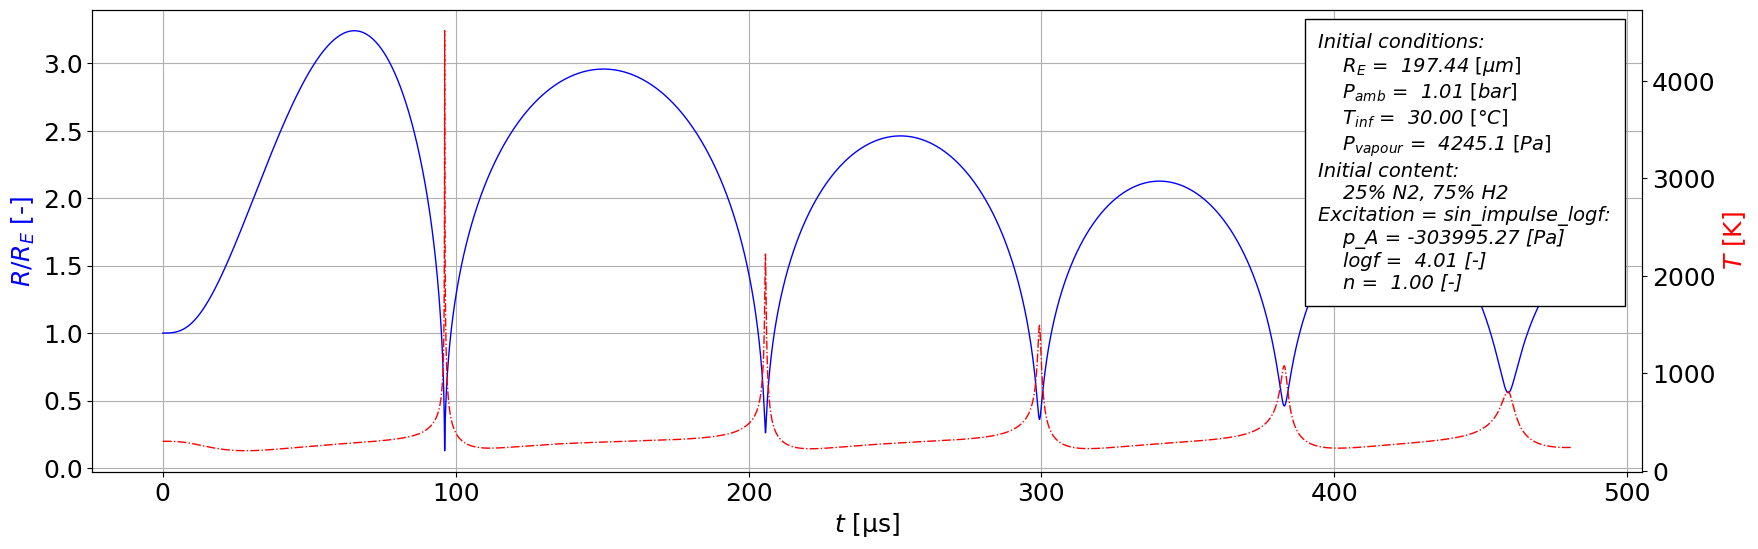

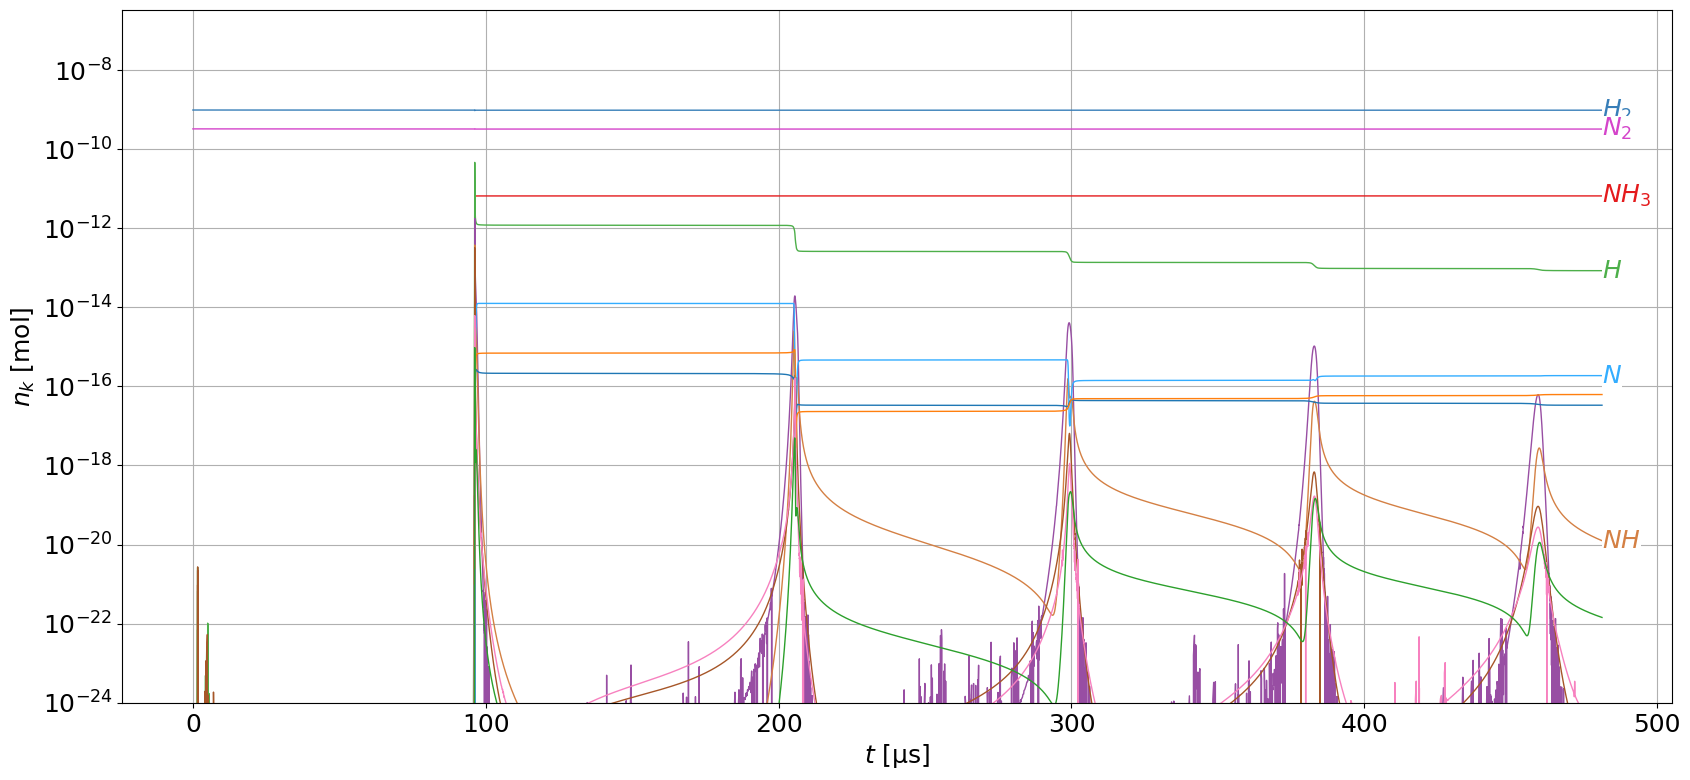

Control parameters:
    ID = 0
    R_E = 197.44 [um]
    ratio = 1.00 [-]
    P_amb = 1.01 [bar]
    alfa_M = 0.35 [-]
    T_inf = 30.00 [°C]
    P_v = 4245.13 [Pa]
    mu_L = 0.81 [mPa*s]
    surfactant = 1.00 [-]    
    excitation = 'sin_impulse_logf'
    (p_A =-303995.27 [Pa]; logf = 4.01 [-]; n = 1.00 [-])
    Initial content: 25% N2, 75% H2
Simulation info:
    error_code = 0 (success = True)
    elapsed_time = 1.75 [s]
    steps = 19964 [-]
Final state:
    R_final = 197.10 [um];   R_dot_final =-1.2192378025981062e-12 [m/s];   T_final = 303.15 [K]
    n_NH3_final = 6.58e-12 [mol]
    Final molar concentrations: [mol/cm^3]
        NH3   :   2.0509404273682193e-07;    H2    :   3.0213400423685444e-05;    H     :    6.401695248490624e-15;    NH2   :    8.493686641324585e-24;    
        NH    :   3.0458044490992423e-22;    N     :   3.0918936080291867e-12;    NNH   :    2.819297064153725e-25;    N2H4  :    1.944963568104136e-13;    
        N2H3  :    2.791946601914719e-12;    N2H2

In [39]:
"""Plot a certain simulation"""

# converts a line of all_data to a dictionary containing the control parameters (cpar)
def line_to_dict(line):
    # check 'full_bubble_model.py' settings
    if (de.enable_heat_transfer != line['enable_heat_transfer'] or
        de.enable_evaporation != line['enable_evaporation'] or
        de.enable_reactions != line['enable_reactions'] or
        de.enable_dissipated_energy != line['enable_dissipated_energy'] or
        de.target_specie != line['target_specie'] or
        de.excitation_type != line['excitation_type']):
        print(colored(f'Error: the settings of \'full_bubble_model.py\' do not match the current settings', 'red'))

    gases = str(line['gases'])
    gases = [int(index) for index in gases.split(' ') if index != '']
    fractions = str(line['fractions'])
    fractions = [float(frac) for frac in fractions.split(' ') if frac != '']

    cpar = de.dotdict(dict(
        ID = line['ID'],                  # ID of control parameter (not used during calculation)
    # Initial conditions:
        R_E = line['R_E'],                # bubble equilibrium radius [m]
        ratio = line['ratio'],            # initial radius / equilibrium radius R_0/R_E [-]
        gases = gases,                    # indexes of species in initial bubble (list of species indexes)
        fractions = fractions,            # molar fractions of species in initial bubble (list of fractions for every gas)
    # Ambient parameters:
        P_amb = line['P_amb'],            # ambient pressure [Pa]
        T_inf = line['T_inf'],            # ambient temperature [K]
    # Liquid parameters:
        alfa_M = line['alfa_M'],          # water accommodation coefficient [-]
        P_v = line['P_v'],                # vapour pressure [Pa]
        mu_L = line['mu_L'],              # dynamic viscosity [Pa*s]
        c_L = line['c_L'],                # sound speed [m/s]
        surfactant = line['surfactant'],  # surfactant (surface tension modfier) [-]
    ))

    # Excitation parameters:
    for arg in de.excitation_args:
        cpar[arg] = line[arg]

    return cpar

cpar = line_to_dict(good_data.iloc[5])   # choose the most energy efficient one
de.plot(cpar, show_legend=False)